# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import sys  

from scipy.stats import pearsonr
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import scanpy as sc
import spatial_tools as se

sys.path.insert(0, './cellphonedb/src/api_endpoints/terminal_api/method_terminal_api_endpoints/')
from method_terminal_commands import statistical_analysis

/home/michal/.miniconda3/envs/cellrank/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


# Load the data

In [2]:
adata = sc.datasets.paul15()

adata.var_names = [str(g).upper() for g in adata.var_names]

/home/michal/.miniconda3/envs/cellrank/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'paul15_clusters' as categorical
/home/michal/.miniconda3/envs/cellrank/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Trying to set attribute `.uns` of view, copying.


Normalize and create `.raw`.

In [3]:
sc.pp.normalize_per_cell(adata)

adata.raw = adata.copy()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


## Save the counts

In [4]:
df_expr_matrix = adata.raw.X
df_expr_matrix = df_expr_matrix.T
df_expr_matrix = pd.DataFrame(df_expr_matrix)

df_expr_matrix.columns= adata.obs.index
df_expr_matrix.set_index(adata.raw.var.index, inplace=True) 
df_expr_matrix.to_csv('counts.txt', sep='\t')

## Save the cluster information

In [5]:
df_meta = pd.DataFrame(data={'Cell': list(adata.obs_names), 'cell_type': list(adata.obs['paul15_clusters'])})
df_meta.set_index('Cell', inplace=True)
df_meta.to_csv('meta.txt', sep='\t')

# Run the statistical analysis

## CellPhoneDB

In [6]:
statistical_analysis(meta_filename='meta.txt', counts_filename='counts.txt', threshold=0.01, threads=8,
                     debug_seed=0, iterations=1000,
                     counts_data='gene_name')

[ ][APP][05/11/20-00:11:46][WARNING] Latest local available version is `v2.0.0`, using it
[ ][APP][05/11/20-00:11:46][WARNING] User selected downloaded database `v2.0.0` is available, using it
[ ][CORE][05/11/20-00:11:46][INFO] Initializing SqlAlchemy CellPhoneDB Core
[ ][CORE][05/11/20-00:11:46][INFO] Using custom database at /home/michal/.cpdb/releases/v2.0.0/cellphone.db
[ ][APP][05/11/20-00:11:46][INFO] Launching Method cpdb_statistical_analysis_local_method_launcher
[ ][APP][05/11/20-00:11:46][INFO] Launching Method _set_paths
[ ][APP][05/11/20-00:11:46][WARNING] Output directory (/opt/projects/helmholtz/phonedb/out) exist and is not empty. Result can overwrite old results
[ ][APP][05/11/20-00:11:46][INFO] Launching Method _load_meta_counts
[ ][CORE][05/11/20-00:11:48][INFO] Launching Method cpdb_statistical_analysis_launcher
[ ][CORE][05/11/20-00:11:48][INFO] Launching Method _counts_validations


/opt/projects/helmholtz/phonedb/cellphonedb/src/core/methods/method_launcher.py:122: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  counts = counts.astype(pd.np.float)  # type: pd.DataFrame


[ ][CORE][05/11/20-00:11:48][INFO] [Cluster Statistical Analysis Simple] Threshold:0.01 Iterations:1000 Debug-seed:0 Threads:8 Precision:3
[ ][CORE][05/11/20-00:11:48][WARNING] Debug random seed enabled. Setted to 0
[ ][CORE][05/11/20-00:11:48][INFO] Running Simple Prefilters
[ ][CORE][05/11/20-00:11:48][INFO] Running Real Simple Analysis


/opt/projects/helmholtz/phonedb/cellphonedb/src/core/methods/cpdb_statistical_analysis_simple_method.py:28: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.random.seed(debug_seed)


[ ][CORE][05/11/20-00:11:48][INFO] Running Statistical Analysis


/opt/projects/helmholtz/phonedb/cellphonedb/src/core/methods/cpdb_statistical_analysis_helper.py:53: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.random.shuffle(meta_copy['cell_type'])
/opt/projects/helmholtz/phonedb/cellphonedb/src/core/methods/cpdb_statistical_analysis_helper.py:53: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.random.shuffle(meta_copy['cell_type'])
/opt/projects/helmholtz/phonedb/cellphonedb/src/core/methods/cpdb_statistical_analysis_helper.py:53: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.random.shuffle(meta_copy['cell_type'])
/opt/projects/helmholtz/phonedb/cellphonedb/src/core/methods/cpdb_statistical_analysis_helper.py:53: FutureWarning: The pandas.np module is deprecated and wi

[ ][CORE][05/11/20-00:15:53][INFO] Building Pvalues result
[ ][CORE][05/11/20-00:16:43][INFO] Building Simple results


/opt/projects/helmholtz/phonedb/cellphonedb/src/core/methods/cpdb_statistical_analysis_helper.py:44: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  significant_means.at[index, cluster_interaction] = pd.np.nan
/opt/projects/helmholtz/phonedb/cellphonedb/src/core/methods/cpdb_statistical_analysis_simple_method.py:172: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  deconvoluted_result['complex_name'] = pd.np.nan


[ ][CORE][05/11/20-00:16:44][INFO] [Cluster Statistical Analysis Complex] Threshold:0.01 Iterations:1000 Debug-seed:0 Threads:8 Precision:3
[ ][CORE][05/11/20-00:16:44][WARNING] Debug random seed enabled. Setted to 0
[ ][CORE][05/11/20-00:16:44][INFO] Running Complex Prefilters


/opt/projects/helmholtz/phonedb/cellphonedb/src/core/methods/cpdb_statistical_analysis_complex_method.py:39: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.random.seed(debug_seed)


[ ][CORE][05/11/20-00:16:53][INFO] Running Real Complex Analysis
[ ][CORE][05/11/20-00:16:53][INFO] Running Statistical Analysis


/opt/projects/helmholtz/phonedb/cellphonedb/src/core/methods/cpdb_statistical_analysis_helper.py:53: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.random.shuffle(meta_copy['cell_type'])
/opt/projects/helmholtz/phonedb/cellphonedb/src/core/methods/cpdb_statistical_analysis_helper.py:53: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.random.shuffle(meta_copy['cell_type'])
/opt/projects/helmholtz/phonedb/cellphonedb/src/core/methods/cpdb_statistical_analysis_helper.py:53: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.random.shuffle(meta_copy['cell_type'])
/opt/projects/helmholtz/phonedb/cellphonedb/src/core/methods/cpdb_statistical_analysis_helper.py:53: FutureWarning: The pandas.np module is deprecated and wi

[ ][CORE][05/11/20-00:21:11][INFO] Building Pvalues result
[ ][CORE][05/11/20-00:21:29][INFO] Building Complex results


/opt/projects/helmholtz/phonedb/cellphonedb/src/core/methods/cpdb_statistical_analysis_helper.py:44: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  significant_means.at[index, cluster_interaction] = pd.np.nan
/opt/projects/helmholtz/phonedb/cellphonedb/src/core/methods/cpdb_statistical_analysis_complex_method.py:245: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  deconvoluted_result['complex_name'] = pd.np.nan


In [7]:
pvals = pd.read_csv('out/pvalues.csv')
print(pvals.shape)
pvals.head()

(34, 372)


,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,...,9GMP|19Lymph,9GMP|1Ery,9GMP|2Ery,9GMP|3Ery,9GMP|4Ery,9GMP|5Ery,9GMP|6Ery,9GMP|7MEP,9GMP|8Mk,9GMP|9GMP
0,CPI-SS00A8596B5,PVR_TNFSF9,simple:P15151,simple:P41273,PVR,TNFSF9,True,True,False,InnateDB-All,...,0.032,1.000,1.000,1.000,0.056,1.000,1.000,1.000,0.015,1.000
1,CPI-SS085EE60B1,TGFB1_TGFBR3,simple:P01137,simple:Q03167,TGFB1,TGFBR3,True,False,True,curated,...,1.000,0.046,0.069,0.069,0.053,0.061,0.045,0.000,0.014,0.077
2,CPI-SS0ACD487F0,L1CAM_L1CAM,simple:P32004,simple:P32004,L1CAM,L1CAM,False,False,False,curated,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
3,CPI-SS0DA033F03,TNFRSF1A_GRN,simple:P19438,simple:P28799,TNFRSF1A,GRN,True,True,False,"IMEx,InnateDB-All,MINT",...,0.084,0.985,1.000,1.000,0.984,1.000,0.992,0.811,0.000,0.078
4,CPI-SS0C4E86714,TNFRSF1B_GRN,simple:P20333,simple:P28799,TNFRSF1B,GRN,True,True,False,"IMEx,InnateDB-All,MINT",...,0.061,0.961,1.000,1.000,0.984,1.000,1.000,0.819,0.000,0.054


In [8]:
pvals_clean = pvals.iloc[:, 11:]
pvals_clean.index = pd.MultiIndex.from_frame(pvals[['gene_a', 'gene_b']].astype('str'))
pvals_clean.columns = pd.MultiIndex.from_tuples(tuple(pvals_clean.columns.str.split('|')))
pvals_clean.head()

10GMP                                                     \
                 10GMP 11DC 12Baso 13Baso   14Mo 15Mo 16Neu  17Neu  18Eos   
gene_a   gene_b                                                             
PVR      TNFSF9  1.000  1.0  1.000  1.000  1.000  1.0   1.0  1.000  1.000   
TGFB1    TGFBR3  0.000  1.0  0.000  1.000  1.000  1.0   1.0  1.000  1.000   
L1CAM    L1CAM   1.000  1.0  1.000  1.000  1.000  1.0   1.0  1.000  1.000   
TNFRSF1A GRN     0.273  0.0  0.047  0.014  0.007  0.0   0.0  0.899  0.681   
TNFRSF1B GRN     0.361  0.0  0.088  0.008  0.008  0.0   0.0  0.947  0.727   

                         ...    9GMP                                     \
                19Lymph  ... 19Lymph   1Ery   2Ery   3Ery   4Ery   5Ery   
gene_a   gene_b          ...                                              
PVR      TNFSF9   1.000  ...   0.032  1.000  1.000  1.000  0.056  1.000   
TGFB1    TGFBR3   1.000  ...   1.000  0.046  0.069  0.069  0.053  0.061   
L1CAM    L1CAM    1.000  ...   1.000  1.000  1.000  1.000  1.000  1.000   
TNFRSF1A GRN      0.108  ...   0.084  0.985  1.000  1.000  0.984  1.000   
TNFRSF1B GRN      0.154  ...   0.061  0.961  1.000  1.000  0.984  1.000   

                                             
                  6Ery   7MEP    8Mk   9GMP  
gene_a   gene_b                              
PVR      TNFSF9  1.000  1.000  0.015  1.000  
TGFB1    TGFBR3  0.045  0.000  0.014  0.077  
L1CAM    L1CAM   1.000  1.000  1.000  1.000  
TNFRSF1A GRN     0.992  0.811  0.000  0.078  
TNFRSF1B GRN     1.000  0.819  0.000  0.054  

[5 rows x 361 columns]

For some reason, the last 11 names are NaN.

In [9]:
pvals_clean.tail(12)

10GMP                                                          \
               10GMP   11DC 12Baso 13Baso   14Mo   15Mo  16Neu  17Neu  18Eos   
gene_a gene_b                                                                  
SELP   SELPLG  0.000  0.000  0.015  0.000  0.000  0.426  0.748  0.062  0.485   
THY1   nan     1.000  1.000  1.000  0.415  0.336  0.265  0.358  1.000  0.000   
VWF    nan     1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000   
L1CAM  nan     1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000   
PLAUR  nan     1.000  1.000  1.000  0.870  0.757  0.406  0.748  1.000  0.000   
THY1   nan     0.289  0.008  1.000  0.210  0.460  0.023  0.008  0.217  1.000   
F10    nan     1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000   
C3     nan     1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000   
GP1BA  nan     0.094  0.000  1.000  0.032  0.194  0.000  0.000  0.115  1.000   
THY1   nan     0.217  0.055  1.000  1.000  1.000  1.000  1.000  1.000  0.015   
ICAM2  nan     0.008  1.000  0.000  0.000  0.008  0.008  0.008  0.007  1.000   
ICAM4  nan     0.931  1.000  0.635  0.838  0.861  0.821  0.868  0.407  1.000   

                       ...    9GMP                                            \
              19Lymph  ... 19Lymph   1Ery   2Ery   3Ery   4Ery   5Ery   6Ery   
gene_a gene_b          ...                                                     
SELP   SELPLG   0.000  ...   0.000  0.485  0.485  0.485  0.477  0.485  0.461   
THY1   nan      0.016  ...   0.008  1.000  1.000  1.000  1.000  1.000  1.000   
VWF    nan      1.000  ...   0.024  1.000  1.000  1.000  1.000  1.000  1.000   
L1CAM  nan      1.000  ...   1.000  1.000  1.000  1.000  1.000  1.000  1.000   
PLAUR  nan      0.008  ...   1.000  1.000  1.000  1.000  1.000  1.000  1.000   
THY1   nan      0.165  ...   0.095  0.274  0.367  1.000  0.344  0.259  0.267   
F10    nan      1.000  ...   1.000  1.000  1.000  1.000  1.000  1.000  1.000   
C3     nan      1.000  ...   1.000  1.000  1.000  1.000  1.000  1.000  1.000   
GP1BA  nan      0.111  ...   1.000  1.000  1.000  1.000  1.000  1.000  1.000   
THY1   nan      0.000  ...   0.000  1.000  1.000  1.000  1.000  1.000  1.000   
ICAM2  nan      1.000  ...   1.000  1.000  1.000  1.000  0.874  1.000  0.874   
ICAM4  nan      1.000  ...   1.000  1.000  1.000  1.000  0.592  1.000  0.461   

                                    
                7MEP    8Mk   9GMP  
gene_a gene_b                       
SELP   SELPLG  0.416  0.485  0.000  
THY1   nan     1.000  0.101  1.000  
VWF    nan     1.000  0.385  1.000  
L1CAM  nan     1.000  1.000  1.000  
PLAUR  nan     1.000  1.000  1.000  
THY1   nan     1.000  1.000  0.226  
F10    nan     1.000  1.000  1.000  
C3     nan     1.000  1.000  1.000  
GP1BA  nan     1.000  1.000  1.000  
THY1   nan     1.000  1.000  1.000  
ICAM2  nan     1.000  0.746  0.725  
ICAM4  nan     1.000  0.396  0.425  

[12 rows x 361 columns]

In [10]:
pvals_clean = pvals_clean.iloc[:23]

## Run spatial_tools' permutation test

In [11]:
res = se.graph.perm_test(adata, "paul15_clusters", interactions=list(pvals_clean.index),
                        fdr_method=None, inplace=False,
                        threshold=0.01, seed=0, n_perms=1000, n_jobs=1)
print(res.means.sparse.density)  # should be a sparse dataframe

df = res.pvalues
print(df.shape)

df.head()


(23, 361)


cluster1         10GMP                                                     \
cluster2         10GMP 11DC 12Baso 13Baso   14Mo 15Mo 16Neu  17Neu  18Eos   
a        b                                                                  
PVR      TNFSF9  1.000  1.0  1.000  1.000  1.000  1.0   1.0  1.000  1.000   
TGFB1    TGFBR3  0.002  1.0  0.001  1.000  1.000  1.0   1.0  1.000  1.000   
L1CAM    L1CAM   1.000  1.0  1.000  1.000  1.000  1.0   1.0  1.000  1.000   
TNFRSF1A GRN     0.295  0.0  0.062  0.014  0.009  0.0   0.0  0.872  0.628   
TNFRSF1B GRN     0.344  0.0  0.071  0.006  0.001  0.0   0.0  0.920  0.662   

cluster1                 ...    9GMP                                     \
cluster2        19Lymph  ... 19Lymph   1Ery   2Ery   3Ery   4Ery   5Ery   
a        b               ...                                              
PVR      TNFSF9   1.000  ...   0.028  1.000  1.000  1.000  0.049  1.000   
TGFB1    TGFBR3   1.000  ...   1.000  0.105  0.091  0.075  0.068  0.076   
L1CAM    L1CAM    1.000  ...   1.000  1.000  1.000  1.000  1.000  1.000   
TNFRSF1A GRN      0.141  ...   0.139  0.966  0.999  1.000  0.992  0.997   
TNFRSF1B GRN      0.158  ...   0.079  0.963  1.000  1.000  0.999  1.000   

cluster1                                     
cluster2          6Ery   7MEP    8Mk   9GMP  
a        b                                   
PVR      TNFSF9  1.000  1.000  0.009  1.000  
TGFB1    TGFBR3  0.049  0.006  0.018  0.084  
L1CAM    L1CAM   1.000  1.000  1.000  1.000  
TNFRSF1A GRN     0.995  0.829  0.026  0.070  
TNFRSF1B GRN     1.000  0.840  0.007  0.033  

[5 rows x 361 columns]

# Compare the results

In [12]:
pearsonr(pvals_clean.values.flat, df.values.flat)

(0.993250652274079, 0.0)

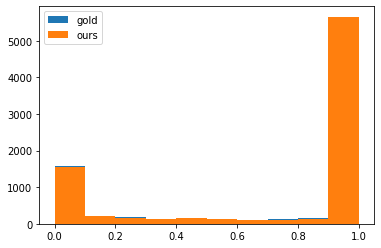

In [13]:
plt.hist(pvals_clean.values.flat, label='gold')
plt.hist(df.values.flat, label='ours')
_ = plt.legend()

Text(0, 0.5, 'gold')

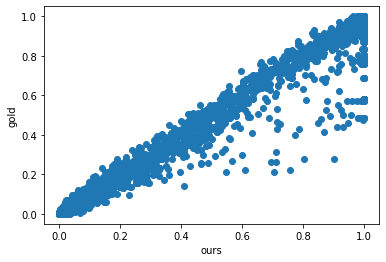

In [14]:
plt.scatter(df.values.flat, pvals_clean.values.flat)
plt.xlabel("ours")
plt.ylabel("gold")

## Maximum absolute difference

In [15]:
np.max(np.abs(df.values - pvals_clean.values))

0.627

# % of significant

In [16]:
sig_df = df.values <= 0.05
sig_gold = pvals_clean.values <= 0.05

sig_df.sum() / len(df.values.flat), sig_gold.sum() / len(pvals_clean.values.flat)

(0.16247139588100687, 0.1657232325665422)

In [17]:
mismatch = sig_df != sig_gold
m_df = df.values[mismatch]
m_gold = pvals_clean.values[mismatch]

## Mismatching significant

Text(0, 0.5, 'gold')

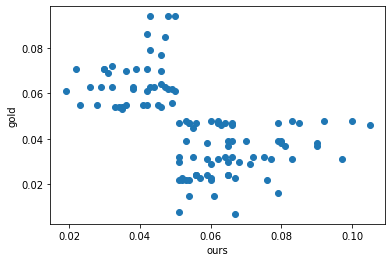

In [18]:
plt.scatter(m_df, m_gold)
plt.xlabel("ours")
plt.ylabel("gold")

In [19]:
np.max(np.abs(m_df - m_gold))

0.066